# SI training scheme on subject 1~9

In [ ]:
from dataset.matDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 562),
    activate_func = nn.ELU,
    dropout = 0.2952126353064908,
    kernel_size = 10,
    dense_size = 176,
    filter_number = 32
)


optimizer = optim.SGD(
    model.parameters(),
    lr = 0.08357707054864591,
    weight_decay = 0.1
)
 

for _ in range(1, 10):

    train_dataset = SI_dataset()
    test_dataset = SI_dataset(train = False)

    train_loader = DataLoader(train_dataset, batch_size = 58)

    device = torch.device('cuda:0')

    model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 400, train_loader, test_dataset)



In [ ]:
from importlib import reload
import utils
print(model.FC1)
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')
print(torch.argmax(model(test_dataset.data.to(device)), dim = 1))

# Test SI with DA

In [ ]:
from dataset.matDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 125),
    activate_func = nn.ELU,
    dropout = 0.9,
    kernel_size = 12,
    dense_size = 91,
    filter_number = 32
)


optimizer = optim.SGD(
    model.parameters(),
    lr = 0.1,
    weight_decay = 0.1
)

train_dataset = SI_dataset(DA = True)
test_dataset = SI_dataset(train = False, DA = True)

train_loader = DataLoader(train_dataset, batch_size = 128)


device = torch.device('cuda:0')

model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 100, train_loader, test_dataset)



In [ ]:
from importlib import reload
import utils
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')

# Test SI and model that mul M to I

In [ ]:
from dataset.matDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 562),
    activate_func = nn.ELU,
    dropout = 0.9,
    kernel_size = 25,
    dense_size = 128,
    filter_number = 32
)


optimizer = optim.Adam(
    model.parameters(),
    lr = 0.00001,
    weight_decay = 0.1
)
 
train_dataset = SI_dataset()
test_dataset = SI_dataset(train = False)

train_loader = DataLoader(train_dataset, batch_size = 128)


device = torch.device('cuda:0')

model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 400, train_loader, test_dataset)



In [ ]:
from importlib import reload
import utils
print(model.FC1)
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')
print(torch.argmax(model(test_dataset.data.to(device)), dim = 1))

# Test

In [ ]:
from dataset.matDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 562),
    activate_func = nn.ELU,
    dropout = 0.9,
    kernel_size = 25,
    dense_size = 128,
    filter_number = 32
)


optimizer = optim.Adam(
    model.parameters(),
    lr = 0.00001,
    weight_decay = 0.1
)
 
train_dataset = SI_dataset()
test_dataset = SI_dataset(train = False)

train_loader = DataLoader(train_dataset, batch_size = 128)


device = torch.device('cuda:0')

model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 400, train_loader, test_dataset)



In [ ]:
from importlib import reload
import utils
print(model.FC1)
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')
print(torch.argmax(model(test_dataset.data.to(device)), dim = 1))

# SI origin dataset 

In [ ]:
from dataset.npzDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 250),
    activate_func = nn.ELU,
    dropout = 0.9,
    kernel_size = 25,
    dense_size = 128,
    filter_number = 32
)


optimizer = optim.Adam(
    model.parameters(),
    lr = 0.00001,
    weight_decay = 0.1
)

train_dataset = SI_dataset(DA = True)
test_dataset = SI_dataset(train = False, DA = True)

train_loader = DataLoader(train_dataset, batch_size = 256)


device = torch.device('cuda:0')

model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 400, train_loader, test_dataset)



Sequential(
  (0): Linear(in_features=10560, out_features=128, bias=True)
  (1): ELU(alpha=1.0)
)


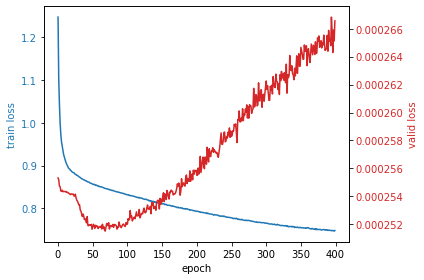

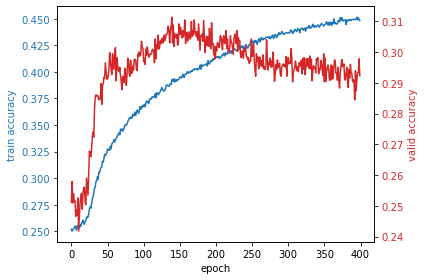

tensor([0, 2, 1,  ..., 2, 0, 1], device='cuda:0')


In [2]:
from importlib import reload
import utils
print(model.FC1)
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')
print(torch.argmax(model(test_dataset.data.to(device)), dim = 1))

# SI without DA

In [ ]:
from dataset.matDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 562),
    activate_func = nn.ELU,
    dropout = 0.7,
    kernel_size = 25,
    dense_size = 128,
    filter_number = 32
)


optimizer = optim.Adam(
    model.parameters(),
    lr = 0.00001,
    weight_decay = 0.1
)

train_dataset = SI_dataset(test_subject = '03')
test_dataset = SI_dataset(test_subject = '03',train = False)

train_loader = DataLoader(train_dataset, batch_size = 128)


device = torch.device('cuda:0')

model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 400, train_loader, test_dataset)



Sequential(
  (0): Linear(in_features=34496, out_features=128, bias=True)
  (1): ELU(alpha=1.0)
)


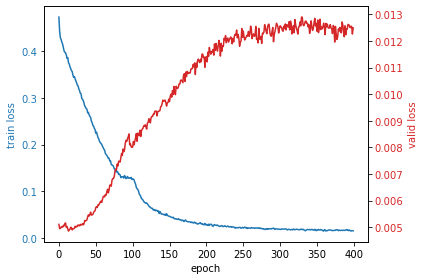

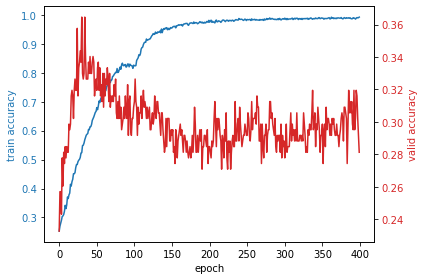

tensor([2, 2, 1, 1, 0, 1, 3, 3, 1, 2, 3, 3, 3, 0, 2, 3, 2, 3, 2, 1, 1, 2, 3, 1,
        1, 3, 2, 2, 3, 3, 2, 2, 1, 2, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 0, 2, 2,
        3, 0, 1, 2, 1, 3, 3, 3, 0, 3, 0, 1, 2, 2, 2, 1, 3, 3, 2, 1, 3, 2, 3, 2,
        2, 2, 3, 0, 2, 3, 2, 2, 3, 2, 3, 1, 2, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 1,
        2, 0, 3, 0, 1, 2, 0, 2, 0, 2, 3, 2, 0, 0, 3, 2, 2, 3, 2, 2, 0, 2, 2, 2,
        0, 0, 2, 2, 1, 3, 1, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 3, 1, 2, 2, 2,
        0, 2, 2, 2, 1, 3, 1, 2, 3, 3, 3, 3, 2, 3, 0, 2, 3, 2, 3, 3, 0, 2, 2, 1,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 2, 0, 0, 3, 0, 2, 3, 3, 3, 3, 3, 0, 1,
        3, 3, 2, 2, 3, 1, 0, 2, 3, 2, 2, 1, 1, 3, 3, 2, 2, 3, 3, 1, 3, 1, 3, 3,
        2, 1, 0, 2, 3, 2, 3, 3, 1, 0, 3, 0, 2, 0, 1, 0, 3, 2, 2, 2, 2, 3, 2, 2,
        3, 2, 3, 0, 3, 2, 1, 3, 0, 1, 2, 2, 3, 3, 0, 3, 3, 3, 1, 0, 0, 2, 2, 2,
        2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3, 2, 1, 2, 3, 2, 0, 1],
       device='cuda:0')


In [4]:
from importlib import reload
import utils
print(model.FC1)
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')
print(torch.argmax(model(test_dataset.data.to(device)), dim = 1))